In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve, auc, plot_roc_curve, classification_report
from math import exp

In [2]:
csv_url = 'https://github.com/automoto/big-five-data/blob/master/big_five_scores.csv'
df=pd.read_csv('big_five_scores.csv', index_col=0)

# Preprocessing and Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307313 entries, 1 to 334161
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   country                  307141 non-null  object 
 1   age                      307313 non-null  int64  
 2   sex                      307313 non-null  int64  
 3   agreeable_score          307313 non-null  float64
 4   extraversion_score       307313 non-null  float64
 5   openness_score           307313 non-null  float64
 6   conscientiousness_score  307313 non-null  float64
 7   neuroticism_score        307313 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 21.1+ MB


In [4]:
#Drop all nan values after review that there are less than 0.1%
data = df.dropna()

In [5]:
data.head()

,country,age,sex,agreeable_score,extraversion_score,openness_score,conscientiousness_score,neuroticism_score
case_id,,,,,,,,
1,South Afri,24,1,0.753333,0.496667,0.803333,0.886667,0.426667
3,UK,24,2,0.733333,0.680000,0.786667,0.746667,0.590000
4,USA,36,2,0.880000,0.770000,0.860000,0.896667,0.296667
5,UK,19,1,0.690000,0.616667,0.716667,0.636667,0.563333
6,UK,17,1,0.600000,0.713333,0.646667,0.633333,0.513333


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307141 entries, 1 to 334161
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   country                  307141 non-null  object 
 1   age                      307141 non-null  int64  
 2   sex                      307141 non-null  int64  
 3   agreeable_score          307141 non-null  float64
 4   extraversion_score       307141 non-null  float64
 5   openness_score           307141 non-null  float64
 6   conscientiousness_score  307141 non-null  float64
 7   neuroticism_score        307141 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 21.1+ MB


In [7]:
data.describe()

,age,sex,agreeable_score,extraversion_score,openness_score,conscientiousness_score,neuroticism_score
count,307141.000000,307141.000000,307141.000000,307141.000000,307141.000000,307141.000000,307141.000000
mean,25.193953,1.602557,0.696809,0.672328,0.733943,0.702013,0.574405
std,10.002145,0.489370,0.093565,0.108672,0.087612,0.107376,0.125743
min,10.000000,1.000000,0.200000,0.200000,0.253333,0.206667,0.196667
25%,18.000000,1.000000,0.640000,0.600000,0.673333,0.630000,0.486667
50%,22.000000,2.000000,0.703333,0.680000,0.736667,0.706667,0.570000
75%,29.000000,2.000000,0.763333,0.750000,0.796667,0.776667,0.660000
max,99.000000,2.000000,1.000000,0.993333,0.996667,1.000000,0.996667


In [8]:
gender_count = data['sex'].value_counts(normalize=True)
print(f"The data containes {(gender_count.iloc[0]*100):.2f}% female's surveys and {(gender_count.iloc[1]*100):.2f}% male's surveys")

The data containes 60.26% female's surveys and 39.74% male's surveys


In [9]:
#how many countries are in the data
len(data.country.unique())


235

In [10]:
# g = sns.pairplot(data, hue='sex')
# new_labels = ['Male', 'Female']
# for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
# _=g

In [11]:
# g = sns.pairplot(data)
# # new_labels = ['Male', 'Female']
# # for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
# _=g

In [12]:
# personality_traits = ['agreeable_score', 'extraversion_score', 'openness_score', 'conscientiousness_score','neuroticism_score']
# data1 = pd.melt(data, id_vars=['sex'], value_vars=personality_traits)
# data1.loc[(data1.sex == 1),'sex'] = 'Male'
# data1.loc[(data1.sex == 2),'sex'] = 'Female'
# fig, ax = plt.subplots(figsize = (15, 10))
# m = sns.boxplot(ax=ax, data=data1, x="variable", y="value", hue="sex")


# imbalace data handeling

there are 50.5% men i the world, and 49.5% females in the world (https://countrymeters.info/en/World)
The original data containes 60.26% female's surveys and 39.74% male's surveys
we'll try to oversample and undersample our data

In [13]:
print(f"The data containes {(data['sex'].value_counts()[2])} female's surveys and {(data['sex'].value_counts()[1])} male's surveys")

The data containes 185070 female's surveys and 122071 male's surveys


downsampling:

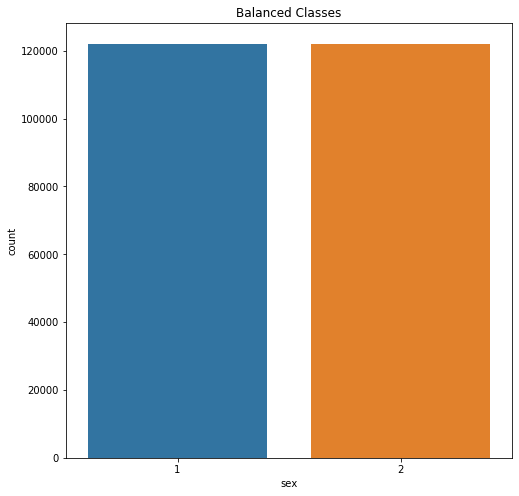

In [14]:
# Shuffle the Dataset.
shuffled_df = data.sample(frac=1,random_state=4)

# Put all the male class in a separate dataset.
male_df = shuffled_df.loc[shuffled_df['sex'] == 1] #1= male, 2= female

#Randomly select 122071 observations from the female (majority class)
female_df = shuffled_df.loc[shuffled_df['sex'] == 2].sample(n=122071,random_state=42)

# Concatenate both dataframes again
downsampled_df = pd.concat([male_df, female_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('sex', data=downsampled_df)
plt.title('Balanced Classes')
plt.show()

oversampling:

In [15]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [28]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

#we should use the data with countries as binary from preprocessing notebook

target_name = 'sex'
X_train, X_test, y_train, y_test = split_df(target_name, data)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

            country  age  agreeable_score  extraversion_score  openness_score  \
case_id                                                                         
1        South Afri   24         0.753333            0.496667        0.803333   
3                UK   24         0.733333            0.680000        0.786667   
4               USA   36         0.880000            0.770000        0.860000   
5                UK   19         0.690000            0.616667        0.716667   
6                UK   17         0.600000            0.713333        0.646667   
...             ...  ...              ...                 ...             ...   
334156          USA   22         0.750000            0.556667        0.733333   
334157          USA   22         0.600000            0.620000        0.566667   
334158          USA   22         0.820000            0.716667        0.753333   
334160     Slovakia   36         0.516667            0.670000        0.783333   
334161    Australia   35    

In [31]:
#before and after oversample
from collections import Counter
print(sorted(Counter(y_train).items()))

print(sorted(Counter(y_resampled).items()))


[(1, 97700), (2, 148012)]
[(1, 148012), (2, 148012)]


## outliers handling

In [60]:
#removing countries due to the categorical values
numerical_data = data.drop('country', axis=1)


In [61]:
#Z score outliers remove
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(numerical_data))
threshold = 3

In [62]:
data_wo_outliers = numerical_data[(z < 3).all(axis=1)]

In [63]:
data_wo_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299475 entries, 1 to 334161
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      299475 non-null  int64  
 1   sex                      299475 non-null  int64  
 2   agreeable_score          299475 non-null  float64
 3   extraversion_score       299475 non-null  float64
 4   openness_score           299475 non-null  float64
 5   conscientiousness_score  299475 non-null  float64
 6   neuroticism_score        299475 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 18.3 MB


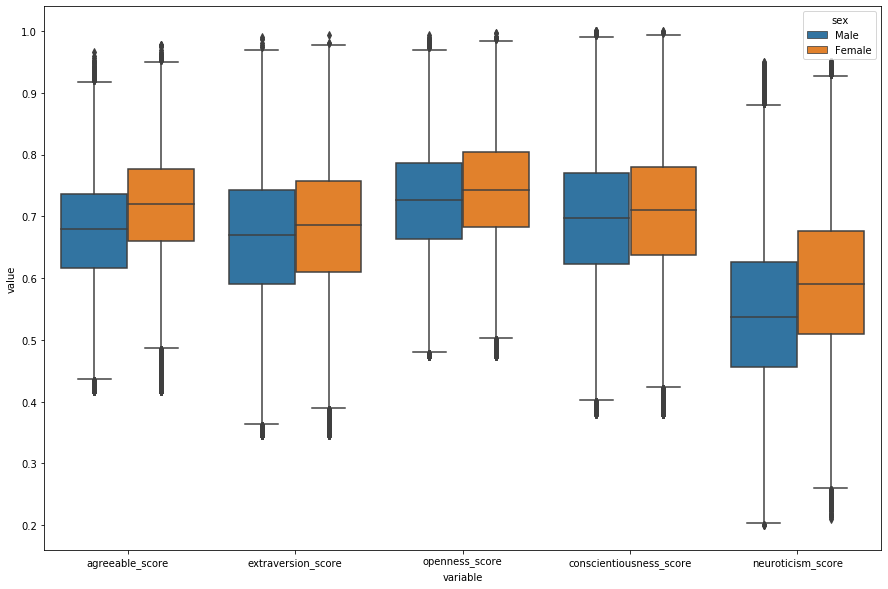

In [64]:
personality_traits = ['agreeable_score', 'extraversion_score', 'openness_score', 'conscientiousness_score','neuroticism_score']

data2 = pd.melt(data_wo_outliers, id_vars =['sex'], value_vars=personality_traits)
data2.loc[(data2.sex == 1),'sex'] = 'Male'
data2.loc[(data2.sex == 2),'sex'] = 'Female'
fig, ax = plt.subplots(figsize = (15, 10))
m = sns.boxplot(ax=ax, data=data2, x="variable", y="value", hue="sex")

In [26]:
def split_df (target_name: str, data: pd.DataFrame):
    """ 
    Split df into random train and test subsets based on target name column

    Parameters
    ----------
    target_name : str
        target column name
    data : DataFrame
        DataFrame  

    return
    ----------
    X_train, X_test, y_train, y_test
    """
    X = data.drop(columns=[target_name])
    print(X)
    y = data[target_name].copy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Models

In [66]:
#prediction of sex with the country categorial features by LogisticRegression model
target_name = 'sex'
# data_wo_outliers2 =data_wo_outliers.head(29000)
X_train1, X_test1, y_train1, y_test1 = split_df(target_name, data_wo_outliers)
Lreg1 = LogisticRegression(max_iter=10000).fit(X_train1, y_train1) 
y_predicted1 = Lreg1.predict(X_test1)
y_predicted2 = Lreg1.predict_proba(X_test1)

         age  agreeable_score  extraversion_score  openness_score  \
case_id                                                             
1         24         0.753333            0.496667        0.803333   
3         24         0.733333            0.680000        0.786667   
4         36         0.880000            0.770000        0.860000   
5         19         0.690000            0.616667        0.716667   
6         17         0.600000            0.713333        0.646667   
...      ...              ...                 ...             ...   
334156    22         0.750000            0.556667        0.733333   
334157    22         0.600000            0.620000        0.566667   
334158    22         0.820000            0.716667        0.753333   
334160    36         0.516667            0.670000        0.783333   
334161    35         0.866667            0.900000        0.956667   

         conscientiousness_score  neuroticism_score  
case_id                                         

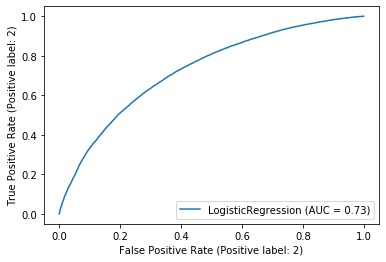

In [67]:
_ = plot_roc_curve(Lreg1, X_test1, y_test1)

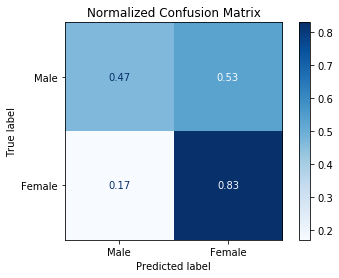

In [68]:
disp = plot_confusion_matrix(Lreg1,
                             X_test1,
                             y_test1,
                             display_labels=['Male', 'Female'],
                             cmap=plt.cm.Blues,
                             normalize="true")
_ = disp.ax_.set_title("Normalized Confusion Matrix")

In [69]:
#prediction of sex without the country feature by DecisionTreeClassifier model
decision_tree = DecisionTreeClassifier()
_ = decision_tree.fit(X_train1, y_train1)

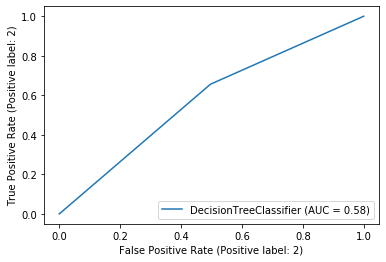

In [70]:
_ = plot_roc_curve(decision_tree, X_test1, y_test1)

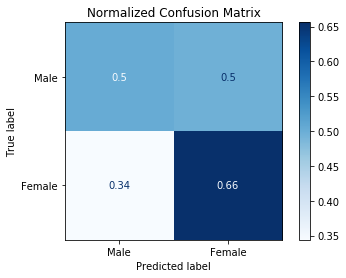

In [71]:
disp = plot_confusion_matrix(decision_tree,
                             X_test1,
                             y_test1,
                             display_labels=['Male', 'Female'],
                             cmap=plt.cm.Blues,
                             normalize="true")
_ = disp.ax_.set_title("Normalized Confusion Matrix")

In [72]:
#prediction of sex without the country feature by GradientBoostingClassifier model
gradient_boosting = GradientBoostingClassifier(random_state=0)
_ = gradient_boosting.fit(X_train1, y_train1)
y_predicted_gb = gradient_boosting.predict(X_test1)

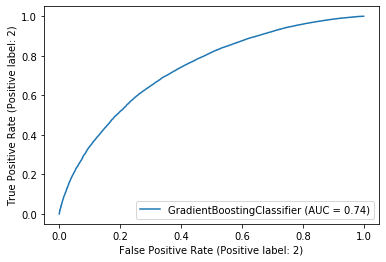

In [73]:
_ = plot_roc_curve(gradient_boosting, X_test1, y_test1)

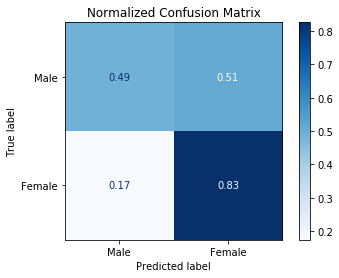

In [74]:
disp = plot_confusion_matrix(gradient_boosting,
                             X_test1,
                             y_test1,
                             display_labels=['Male', 'Female'],
                             cmap=plt.cm.Blues,
                             normalize="true")
_ = disp.ax_.set_title("Normalized Confusion Matrix")

# balanced data results:

downsapled data:

In [34]:
#prediction of sex without the country feature by LogisticRegression model
data_no_country = downsampled_df.drop('country', axis=1)
target_name = 'sex'
X_train, X_test, y_train, y_test = split_df(target_name, data_no_country)
Lreg = LogisticRegression().fit(X_train, y_train) 
y_predicted = Lreg.predict(X_test)

#prediction of sex without the country feature by GradientBoostingClassifier model
gradient_boosting = GradientBoostingClassifier(random_state=0)
_ = gradient_boosting.fit(X_train, y_train)
y_predicted_gb = gradient_boosting.predict(X_test)

         age  agreeable_score  extraversion_score  openness_score  \
case_id                                                             
64175     43         0.723333            0.543333        0.696667   
121204    21         0.633333            0.586667        0.546667   
250591    20         0.840000            0.750000        0.796667   
112324    22         0.466667            0.736667        0.773333   
16943     67         0.760000            0.703333        0.640000   
...      ...              ...                 ...             ...   
154373    47         0.700000            0.763333        0.860000   
36153     20         0.733333            0.790000        0.713333   
214321    36         0.703333            0.786667        0.703333   
60196     20         0.830000            0.870000        0.850000   
146031    25         0.766667            0.820000        0.823333   

         conscientiousness_score  neuroticism_score  
case_id                                         

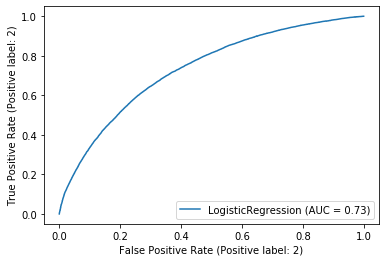

In [35]:
_ = plot_roc_curve(Lreg, X_test, y_test)

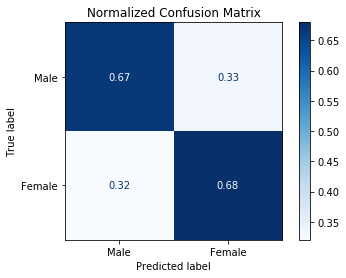

In [37]:
disp = plot_confusion_matrix(Lreg,
                             X_test,
                             y_test,
                             display_labels=['Male', 'Female'],
                             cmap=plt.cm.Blues,
                             normalize="true")
_ = disp.ax_.set_title("Normalized Confusion Matrix for downsampled data")

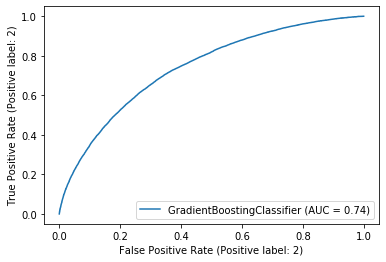

In [36]:
_ = plot_roc_curve(gradient_boosting, X_test, y_test)

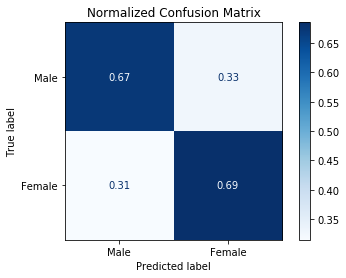

In [103]:
disp = plot_confusion_matrix(gradient_boosting,
                             X_test,
                             y_test,
                             display_labels=['Male', 'Female'],
                             cmap=plt.cm.Blues,
                             normalize="true")
_ = disp.ax_.set_title("Normalized Confusion Matrix for downsampled data")

#oversampled data:

In [38]:
#prediction of sex without the country feature by LogisticRegression model
# data_no_country = oversampled_df.drop('country', axis=1)
target_name = 'sex'
# X_train, X_test, y_train, y_test = split_df(target_name, data_no_country)
Lreg_o = LogisticRegression().fit(X_resampled, y_resampled) 
y_predicted_o = Lreg_o.predict(X_test)

#prediction of sex without the country feature by GradientBoostingClassifier model
gradient_boosting_o = GradientBoostingClassifier(random_state=0)
_ = gradient_boosting_o.fit(X_resampled, y_resampled)
y_predicted_gb_o = gradient_boosting.predict(X_test)

ValueError: could not convert string to float: 'UK'

In [ ]:
_ = plot_roc_curve(Lreg_o, X_test, y_test)

In [ ]:
disp = plot_confusion_matrix(Lreg_o,
                             X_test,
                             y_test,
                             display_labels=['Male', 'Female'],
                             cmap=plt.cm.Blues,
                             normalize="true")
_ = disp.ax_.set_title("Normalized Confusion Matrix for oversampled data")

In [ ]:
_ = plot_roc_curve(gradient_boosting_o, X_test, y_test)

In [ ]:
disp = plot_confusion_matrix(gradient_boosting_o,
                             X_test,
                             y_test,
                             display_labels=['Male', 'Female'],
                             cmap=plt.cm.Blues,
                             normalize="true")
_ = disp.ax_.set_title("Normalized Confusion Matrix for over sampled data")

In [36]:
#IQR outliers remove
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


age                        11.000000
sex                         1.000000
agreeable_score             0.123333
extraversion_score          0.150000
openness_score              0.123333
conscientiousness_score     0.146667
neuroticism_score           0.173333
dtype: float64


In [37]:
data_wo_outliers_IQR = numerical_data[~((numerical_data < (Q1 - 1.5 * IQR)) |(numerical_data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_wo_outliers_IQR.shape

(280939, 7)

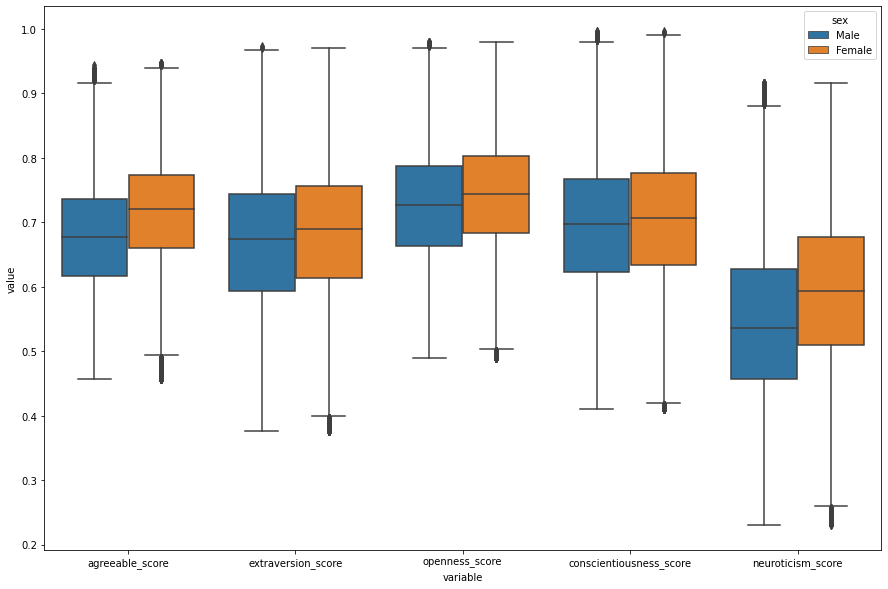

In [38]:
data3 = pd.melt(data_wo_outliers_IQR, id_vars=['sex'], value_vars=personality_traits)
data3.loc[(data3.sex == 1),'sex'] = 'Male'
data3.loc[(data3.sex == 2),'sex'] = 'Female'
fig, ax = plt.subplots(figsize = (15, 10))
m = sns.boxplot(ax=ax, data=data3, x="variable", y="value", hue="sex")

In [39]:
#prediction of sex with the country categorial features by LogisticRegression model
target_name = 'sex'
# data_wo_outliers2 =data_wo_outliers.head(29000)
X_train2, X_test2, y_train2, y_test2 = split_df(target_name, data_wo_outliers_IQR)
Lreg2 = LogisticRegression(max_iter=10000).fit(X_train2, y_train2) 
y_predicted3 = Lreg2.predict(X_test2)
y_predicted4 = Lreg2.predict_proba(X_test2)

         age  agreeable_score  extraversion_score  openness_score  \
case_id                                                             
1         24         0.753333            0.496667        0.803333   
3         24         0.733333            0.680000        0.786667   
4         36         0.880000            0.770000        0.860000   
5         19         0.690000            0.616667        0.716667   
6         17         0.600000            0.713333        0.646667   
...      ...              ...                 ...             ...   
334156    22         0.750000            0.556667        0.733333   
334157    22         0.600000            0.620000        0.566667   
334158    22         0.820000            0.716667        0.753333   
334160    36         0.516667            0.670000        0.783333   
334161    35         0.866667            0.900000        0.956667   

         conscientiousness_score  neuroticism_score  
case_id                                         

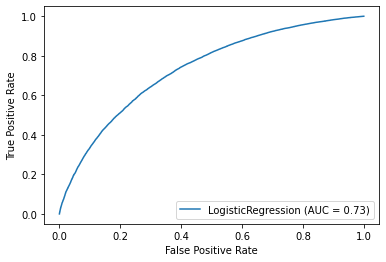

In [40]:
_ = plot_roc_curve(Lreg2, X_test2, y_test2)

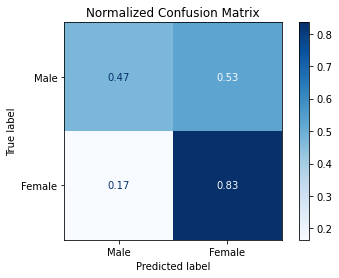

In [41]:
disp = plot_confusion_matrix(Lreg2,
                             X_test2,
                             y_test2,
                             display_labels=['Male', 'Female'],
                             cmap=plt.cm.Blues,
                             normalize="true")
_ = disp.ax_.set_title("Normalized Confusion Matrix")

In [42]:
#prediction of sex without the country feature by DecisionTreeClassifier model
decision_tree2 = DecisionTreeClassifier()
_ = decision_tree2.fit(X_train2, y_train2)

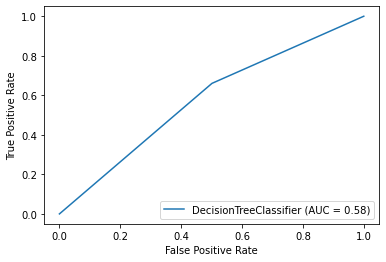

In [43]:
_ = plot_roc_curve(decision_tree2, X_test2, y_test2)

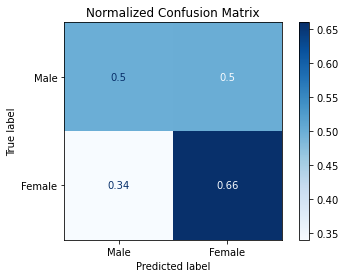

In [44]:
disp = plot_confusion_matrix(decision_tree2,
                             X_test2,
                             y_test2,
                             display_labels=['Male', 'Female'],
                             cmap=plt.cm.Blues,
                             normalize="true")
_ = disp.ax_.set_title("Normalized Confusion Matrix")

In [45]:
#prediction of sex without the country feature by GradientBoostingClassifier model
gradient_boosting2 = GradientBoostingClassifier(random_state=0)
_ = gradient_boosting2.fit(X_train2, y_train2)
y_predicted_gb = gradient_boosting2.predict(X_test2)

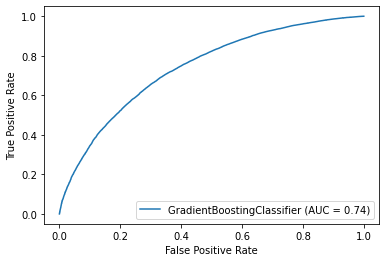

In [46]:
_ = plot_roc_curve(gradient_boosting2, X_test2, y_test2)

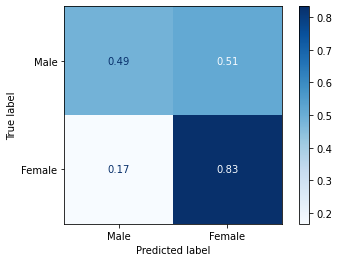

In [47]:
_ = plot_confusion_matrix(gradient_boosting2,
                          X_test2,
                          y_test2,
                          display_labels=['Male', 'Female'],
                          cmap=plt.cm.Blues,
                          normalize="true")

# Logistic Regression model

In [48]:
def split_df (target_name: str, data: pd.DataFrame):
    """ 
    Split df into random train and test subsets based on target name column

    Parameters
    ----------
    target_name : str
        target column name
    data : DataFrame
        DataFrame  

    return
    ----------
    X_train, X_test, y_train, y_test
    """
    X = data.drop(columns=[target_name])
    y = data[target_name].copy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [49]:
#prediction of sex without the country feature by LogisticRegression model
data2 = data.drop('country', axis=1)
#Normalize features
scaler = MinMaxScaler()
names = data2.columns
d = scaler.fit_transform(data2)
scaled_data2 = pd.DataFrame(d, index=data2.index, columns=names)
scaled_data2

,age,sex,agreeable_score,extraversion_score,openness_score,conscientiousness_score,neuroticism_score
case_id,,,,,,,
1,0.157303,0.0,0.691667,0.373950,0.739910,0.857143,0.287500
3,0.157303,1.0,0.666667,0.605042,0.717489,0.680672,0.491667
4,0.292135,1.0,0.850000,0.718487,0.816143,0.869748,0.125000
5,0.101124,0.0,0.612500,0.525210,0.623318,0.542017,0.458333
6,0.078652,0.0,0.500000,0.647059,0.529148,0.537815,0.395833
...,...,...,...,...,...,...,...
334156,0.134831,1.0,0.687500,0.449580,0.645740,0.705882,0.558333
334157,0.134831,0.0,0.500000,0.529412,0.421525,0.558824,0.487500
334158,0.134831,1.0,0.775000,0.651261,0.672646,0.651261,0.412500


In [50]:
target_name = 'sex'
X_train, X_test, y_train, y_test = split_df(target_name, scaled_data2)
Lreg = LogisticRegression().fit(X_train, y_train) 
y_predicted = Lreg.predict(X_test)

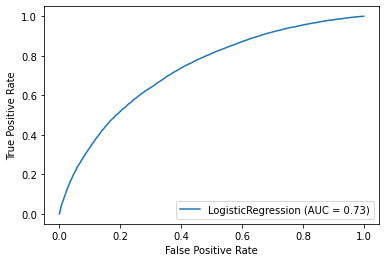

In [51]:
_ = plot_roc_curve(Lreg, X_test, y_test)

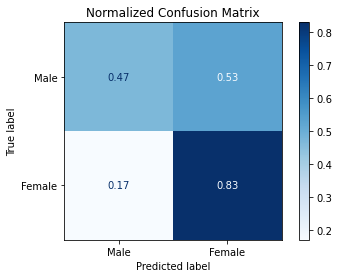

In [52]:
disp = plot_confusion_matrix(Lreg,
                             X_test,
                             y_test,
                             display_labels=['Male', 'Female'],
                             cmap=plt.cm.Blues,
                             normalize="true")
_ = disp.ax_.set_title("Normalized Confusion Matrix")

If the personality survey is of famle, the model can predict it is a female's survey by 83%
But if the personality survey is of male, the model can't predict if it's a male or a famle survey.

In [53]:
target_names = ['Male', 'Female']
report = classification_report(y_test, y_predicted, target_names=target_names)
print(report)

              precision    recall  f1-score   support

        Male       0.65      0.47      0.54     24371
      Female       0.70      0.83      0.76     37058

    accuracy                           0.69     61429
   macro avg       0.68      0.65      0.65     61429
weighted avg       0.68      0.69      0.68     61429



In [54]:
#Build Dataframes of country binary variables and join with data 
countries = pd.get_dummies(data['country'])
data3 = pd.concat([data, countries] ,axis=1)
data3 = data3.drop(columns=['country'])
data3.head()

,age,sex,agreeable_score,extraversion_score,openness_score,conscientiousness_score,neuroticism_score,Afghanista,Albania,Algeria,...,Virgin Isl,W. Samoa,Wake Islan,Wallis and,Western Sa,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
case_id,,,,,,,,,,,,,,,,,,,,,
1,24,1,0.753333,0.496667,0.803333,0.886667,0.426667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24,2,0.733333,0.680000,0.786667,0.746667,0.590000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,36,2,0.880000,0.770000,0.860000,0.896667,0.296667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,19,1,0.690000,0.616667,0.716667,0.636667,0.563333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,17,1,0.600000,0.713333,0.646667,0.633333,0.513333,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#prediction of sex with the country categorial features by LogisticRegression model
target_name = 'sex'
X_train1, X_test1, y_train1, y_test1 = split_df(target_name, data3)
Lreg1 = LogisticRegression(max_iter=10000).fit(X_train1, y_train1) 
y_predicted1 = Lreg1.predict(X_test1)
y_predicted2 = Lreg1.predict_proba(X_test1)

In [56]:
y_scores = y_predicted2[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=2)
auc(fpr, tpr)

C:\Users\efrat\anaconda3\envs\TF\lib\site-packages\sklearn\metrics\_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


nan

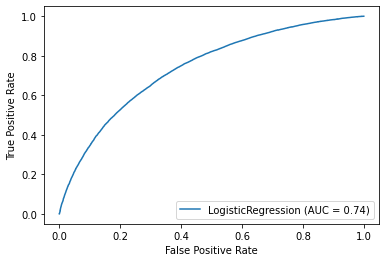

In [57]:
_ = plot_roc_curve(Lreg1, X_test1, y_test1)

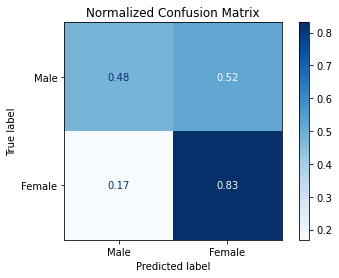

In [58]:
disp1 = plot_confusion_matrix(Lreg1,
                             X_test1,
                             y_test1,
                             display_labels=['Male', 'Female'],
                             cmap=plt.cm.Blues,
                             normalize="true")
_ = disp1.ax_.set_title("Normalized Confusion Matrix")

# Decision Tree model

In [59]:
#prediction of sex without the country feature by DecisionTreeClassifier model
decision_tree = DecisionTreeClassifier()
_ = decision_tree.fit(X_train, y_train)

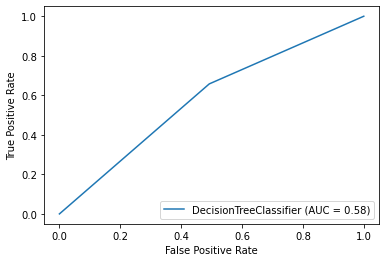

In [60]:
_ = plot_roc_curve(decision_tree, X_test, y_test)

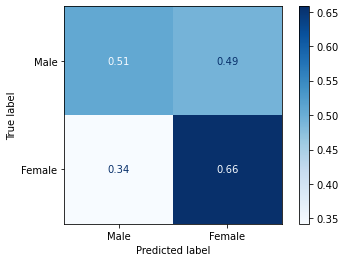

In [61]:
_ = plot_confusion_matrix(decision_tree,
                          X_test,
                          y_test,
                          display_labels=['Male', 'Female'],
                          cmap=plt.cm.Blues,
                          normalize="true")

# Gradient Boosting model


In [62]:
#prediction of sex without the country feature by GradientBoostingClassifier model
gradient_boosting = GradientBoostingClassifier(random_state=0)
_ = gradient_boosting.fit(X_train, y_train)
y_predicted_gb = gradient_boosting.predict(X_test)

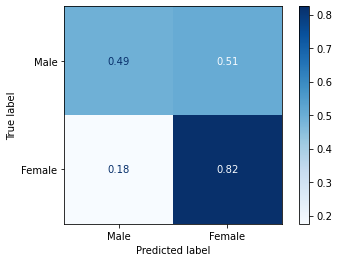

In [63]:
_ = plot_confusion_matrix(gradient_boosting,
                          X_test,
                          y_test,
                          display_labels=['Male', 'Female'],
                          cmap=plt.cm.Blues,
                          normalize="true")

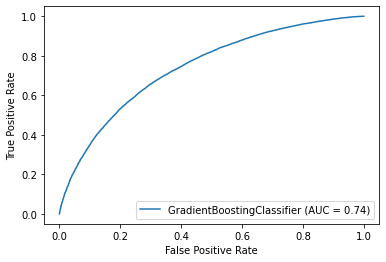

In [64]:
_ = plot_roc_curve(gradient_boosting, X_test, y_test)

In [65]:
#prediction of sex with the country categorial features by GradientBoostingClassifier model
gradient_boosting1 = GradientBoostingClassifier(random_state=0)
_ = gradient_boosting1.fit(X_train1, y_train1)
y_predicted_gb1 = gradient_boosting1.predict(X_test1)

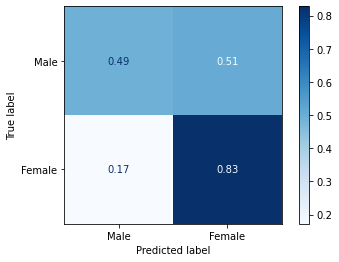

In [66]:
_ = plot_confusion_matrix(gradient_boosting1,
                          X_test1,
                          y_test1,
                          display_labels=['Male', 'Female'],
                          cmap=plt.cm.Blues,
                          normalize="true")

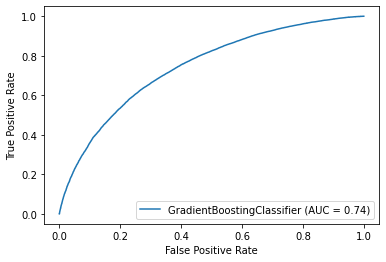

In [67]:
_ = plot_roc_curve(gradient_boosting1, X_test1, y_test1)

# Explainability

### Logistic Regression model - explainability

In [68]:
Lreg.coef_

array([[-0.00915109,  4.87746972,  3.46553004,  0.67728998,  2.04970286,
         5.76378964]])

In [98]:
print("Model coefficients:\n")
for i in range(X_test.shape[1]):
    print(X_test.columns[i], "=", Lreg.coef_[0][i].round(4))

Model coefficients:

age = -0.0092
agreeable_score = 4.8775
extraversion_score = 3.4655
openness_score = 0.6773
conscientiousness_score = 2.0497
neuroticism_score = 5.7638


In [69]:
Lreg.predict_proba(X_test)

array([[0.22570706, 0.77429294],
       [0.33803326, 0.66196674],
       [0.50946957, 0.49053043],
       ...,
       [0.36104394, 0.63895606],
       [0.28990133, 0.71009867],
       [0.20805552, 0.79194448]])

In [70]:
Lreg.predict(X_test)

array([1., 1., 0., ..., 1., 1., 1.])

In [71]:
X_test.head()

,age,agreeable_score,extraversion_score,openness_score,conscientiousness_score,neuroticism_score
case_id,,,,,,
36852,0.292135,0.608333,0.352941,0.354260,0.558824,0.816667
179008,0.101124,0.545833,0.827731,0.587444,0.478992,0.487500
245518,0.292135,0.600000,0.672269,0.533632,0.777311,0.312500
288668,0.168539,0.737500,0.668067,0.704036,0.584034,0.491667
101220,0.191011,0.783333,0.701681,0.834081,0.508403,0.645833


In [72]:
odds_ratio_x1 = Lreg.predict_proba(X_test)[0][1]/Lreg.predict_proba(X_test)[0][0]

In [73]:
print(f"The odds ratio for case id {X_test.index[0]} is {odds_ratio_x1:.2f} meaning that the probability for femal is {odds_ratio_x1:.2f} as high as for male.")

The odds ratio for case id 36852 is 3.43 meaning that the probability for femal is 3.43 as high as for male.


In [74]:
my_slice = X_test.iloc[0].copy(deep=True)

In [75]:
X_j_plus = my_slice[1]+0.1

In [76]:
my_slice[1] =  X_j_plus

In [77]:
my_slice

age                        0.292135
agreeable_score            0.708333
extraversion_score         0.352941
openness_score             0.354260
conscientiousness_score    0.558824
neuroticism_score          0.816667
Name: 36852, dtype: float64

In [78]:
Lreg.predict_proba(my_slice.to_numpy().reshape(1, -1))

array([[0.15181202, 0.84818798]])

In [79]:
odds_ratio_x1_age_plus = Lreg.predict_proba(my_slice.to_numpy().reshape(1, -1))[0][1]/Lreg.predict_proba(my_slice.to_numpy().reshape(1, -1))[0][0]

In [80]:
print(f"The oddsx+1 ratio for case id {X_test.index[0]} is {odds_ratio_x1_age_plus:.2f} meaning that the probability for femal is {odds_ratio_x1_age_plus:.2f} as high as for male.")

The oddsx+1 ratio for case id 36852 is 5.59 meaning that the probability for femal is 5.59 as high as for male.


In [81]:
print(f"oddsx+1 ratio / odds ratio = {odds_ratio_x1_age_plus/odds_ratio_x1}")

oddsx+1 ratio / odds ratio = 1.628642705661934


In [82]:
exp(Lreg.coef_[0][1]*0.1)

1.628642705661936

In [83]:
def explainability_Logistic_Regression (coef: np.array, delta: float):
    value = []
    for i in range(coef.shape[1]):
        value.append(exp(Lreg.coef_[0][i]*delta))
    return value

In [84]:
Explainability = explainability_Logistic_Regression (Lreg.coef_, 0.3) #delta is positive - probability for femal

In [85]:
Explainability_df = pd.Series(np.array(Explainability),  index=X_test.columns.to_list(), name='Explainability')

In [86]:
Explainability_df

age                        0.997258
agreeable_score            4.319937
extraversion_score         2.828252
openness_score             1.225302
conscientiousness_score    1.849492
neuroticism_score          5.635788
Name: Explainability, dtype: float64

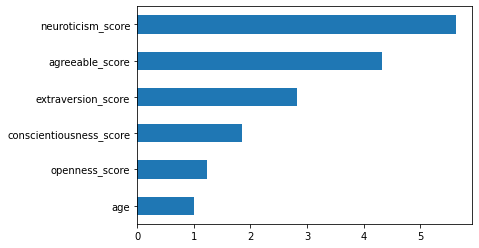

In [87]:
_=Explainability_df.sort_values().plot(kind='barh')

In [88]:
Explainability1 = explainability_Logistic_Regression (Lreg.coef_, -0.3) #delta is negative - probability for male

In [89]:
Explainability1_df = pd.Series(np.array(Explainability1),  index=X_test.columns.to_list(), name='Explainability')

In [90]:
Explainability1_df

age                        1.002749
agreeable_score            0.231485
extraversion_score         0.353575
openness_score             0.816126
conscientiousness_score    0.540689
neuroticism_score          0.177437
Name: Explainability, dtype: float64

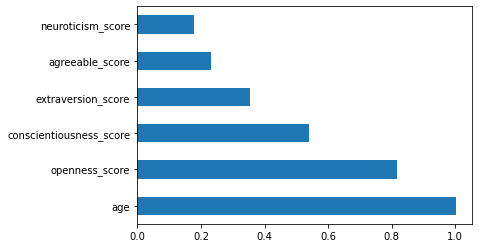

In [91]:
_=Explainability1_df.sort_values(ascending=False).plot(kind='barh')

### Gradient Boosting model - Shap explainability

In [92]:
import shap
#prediction of sex without the country feature by GradientBoostingClassifier model
#gradient_boosting = GradientBoostingClassifier(random_state=0)
#_ = gradient_boosting.fit(X_train, y_train)
#y_predicted_gb = gradient_boosting.predict(X_test)

In [110]:
X100 = shap.utils.sample(X_train, 100) # 100 instances for use as the background distribution
explainer = shap.Explainer(gradient_boosting)
shap_values = explainer(X_train)

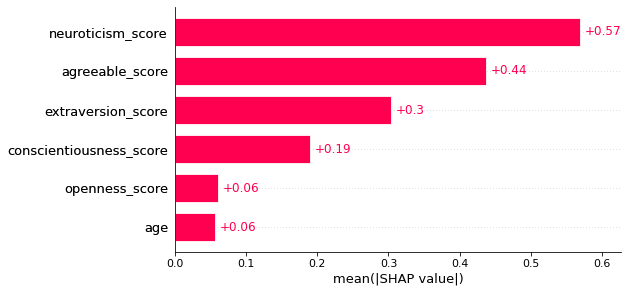

In [113]:
shap.plots.bar(shap_values)

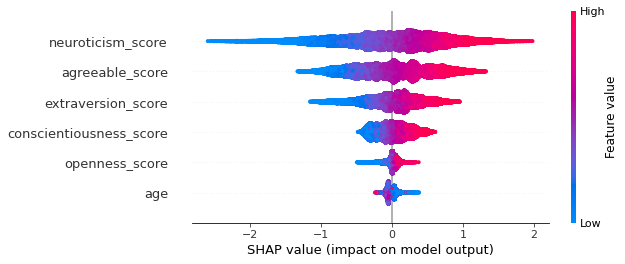

In [114]:
shap.plots.beeswarm(shap_values)